In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
SEED = 82

# Income Classification Dataset

This dataset collects in each row and individual's demographic record with the aim of predicting whether that person earns more or less than 50000 U.S.D. per year.

The collected variables are the following:
- age: the age of an individual
- workclass: employment status of an individual (*Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay Never­worked*)
- fnlwgt: final weight. This is the number of people the census believes the entry represents
- education: the highest level of education achieved by an individual (*Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool*)
- education­num: the highest level of education achieved in numerical form.
- marital­status: marital status of an individual. Married­civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces. (*Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­spouse­absent, Married­AF­spouse*)
- occupation: the general type of occupation of an individual (*Tech­support, Craft­repair, Other­service, Sales, Exec­managerial, Prof­specialty Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces*)
- relationship: represents what this individual is relative to others. (*Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried*)
- race: Descriptions of an individual’s race (*White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black*)
- sex: the biological sex of the individual
- capital­gain: capital gains for an individual
- capital­loss: capital loss for an individual
- hours­per­week: the hours an individual has reported to work per week
- native­country: country of origin for an individual (*United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands*)
- the label: *<=50k, >50k*

Source: https://www.kaggle.com/uciml/adult-census-income

*1) Load the dataset, show the type of variables, look for and deal with any missing values. Show a sample of the resulting dataset.*

In [2]:
df = pd.read_csv('income.csv', index_col=None)
#Replacing "?" with NaN and fixing the column names, this was done for you prior to handing out the dataset
df.replace(' ?', np.NaN, inplace=True)
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [4]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

In the following questions use visualizations to back your answers.

Hint: an objective of some of these questions is to introduce countplots and using the Hue argument, check the Seaborn documentation to learn more.

*2) Show the distribution of the income. Is the dataset balanced?*

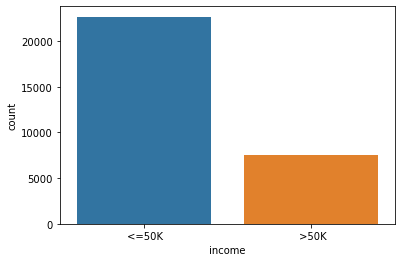

In [6]:
sns.countplot(x='income', data=df);

<span style="color:green">
The dataset is not balanced.
</span>

*3) Is there any gender bias when it comes to income? What about racial bias?*

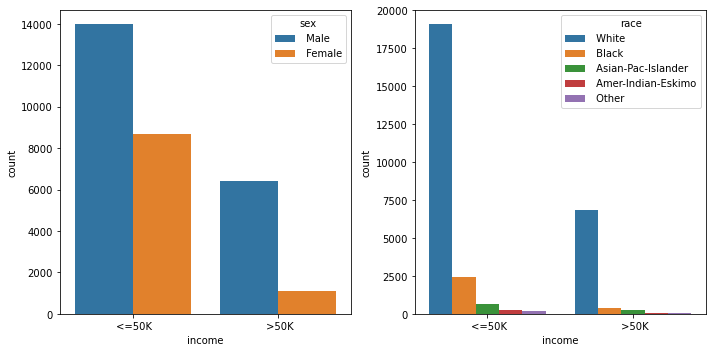

In [7]:
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='income', hue='sex', data=df);
plt.subplot(1,2,2)
sns.countplot(x='income', hue='race', data=df);
plt.tight_layout()

<span style="color:green">
Several arguments can be made from this data with no clear conclusion about this question: 1) We can see that there are less females than males in the high income category but this is also the case for the low category. Also, the differences between the number of males and females within each category is roughly the same. Therefore we cannot deduce any gender bias from this data since it underrepresents female workers. 2) Same argument can be made for race since the dataset is mostly dominated by samples of white individuals.
</span>

*4) Do hardworking people earn more in general?*

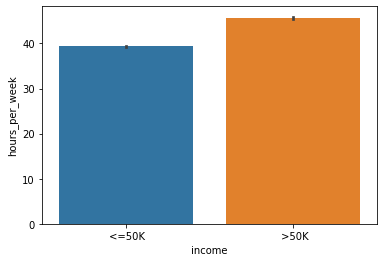

In [8]:
sns.barplot(x='income', y='hours_per_week', data=df);

<span style="color:green">
People who work more hours seem to earn slightly more income.
</span>

*5) Show the effect of educational level on income.*

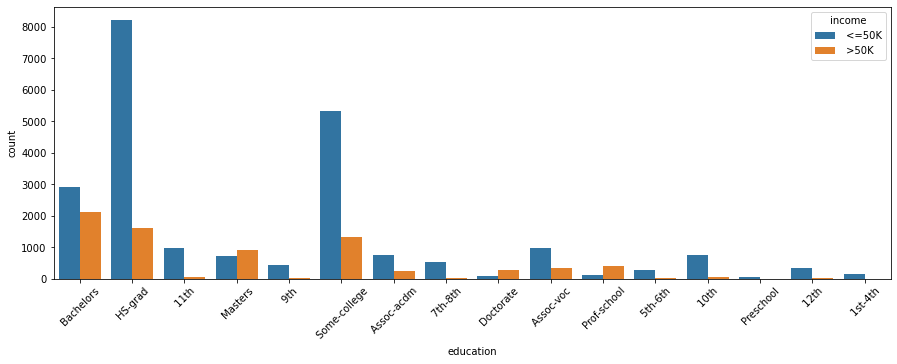

In [9]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.countplot(x='education', hue='income', data=df);

# Classification

*6) Prepare the data for training: encoding variables and data splitting.*

In [10]:
dff = pd.get_dummies(df, drop_first=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 97 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         30162 non-null  int64
 1   fnlwgt                                      30162 non-null  int64
 2   education_num                               30162 non-null  int64
 3   capital_gain                                30162 non-null  int64
 4   capital_loss                                30162 non-null  int64
 5   hours_per_week                              30162 non-null  int64
 6   workclass_ Local-gov                        30162 non-null  uint8
 7   workclass_ Private                          30162 non-null  uint8
 8   workclass_ Self-emp-inc                     30162 non-null  uint8
 9   workclass_ Self-emp-not-inc                 30162 non-null  uint8
 10  workclass_ State-gov              

In [11]:
X = dff.drop('income_ >50K', axis=1)
y = dff['income_ >50K']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

*7) Train a decision tree classifier. Show the training accuracy and F1-score. Show the testing accuracy, F1-score and confusion matrix.*

*Note: we've seen before that the dataset is not balanced. Therefore, we will rely on the F1-score rather than accuracy for model assessment.*

Training accuracy: 0.9999585560943264
Training F1: 0.9999167429855965
Testing accuracy: 0.8117023039946958
Testing F1: 0.6306892067620287


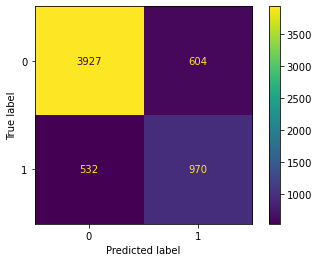

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix

dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train, y_train)
print(f'Training accuracy: {dt.score(X_train, y_train)}')
print(f'Training F1: {f1_score(y_train, dt.predict(X_train))}')
print(f'Testing accuracy: {dt.score(X_test, y_test)}')
print(f'Testing F1: {f1_score(y_test, dt.predict(X_test))}')
plot_confusion_matrix(dt, X_test, y_test);

*8) What are the hyperparameters of a decision tree?*

In [13]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 82,
 'splitter': 'best'}

*9) Use grid search to tune the following hyperparameters: criterion, max depth, max features. Use 10-fold cross-validation with the F1-score as the validation metric.*

*Show the optimal hyperparameters you obtain. Show the same performance metrics as above.*

{'criterion': 'gini', 'max_depth': 13, 'max_features': None}
Training accuracy: 0.8844129470761325
Training F1: 0.7376540306650362
Testing accuracy: 0.8514835073760981
Testing F1: 0.6661698956780925


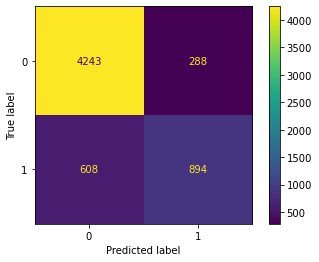

In [14]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 15, 14, 13, 10],
    'max_features': [None, 'sqrt', 'log2']
}
dt = DecisionTreeClassifier(random_state=SEED)

gs = GridSearchCV(dt, dt_params, scoring='f1', cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
best_dt = gs.best_estimator_
print(f'Training accuracy: {best_dt.score(X_train, y_train)}')
print(f'Training F1: {f1_score(y_train, best_dt.predict(X_train))}')
print(f'Testing accuracy: {best_dt.score(X_test, y_test)}')
print(f'Testing F1: {f1_score(y_test, best_dt.predict(X_test))}')
plot_confusion_matrix(best_dt, X_test, y_test);

*10) How are the previous model and the current model different? Comment on that difference.*

<span style="color:green">
The first model has overfit the training data since it scores very well on training but not on testing. After tuning the model, the training accuracy decreased but we have better performance on the test set. Tuning and cross-validating the model has decreased its variance.
</span>

*11) Train a Random Forest classifier to perform the same task. Show the same evaluation metrics as above plus the OOB score.*

OOB Score: 0.8488955199137966
Training accuracy: 0.9999585560943264
Training F1: 0.9999167429855965
Testing accuracy: 0.8475053870379579
Testing F1: 0.6787709497206703


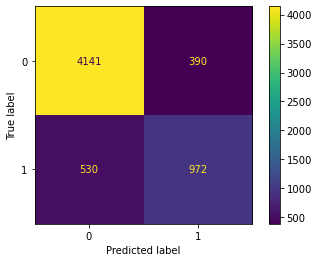

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=SEED, n_jobs=-1)
rf.fit(X_train, y_train)

print(f'OOB Score: {rf.oob_score_}')
print(f'Training accuracy: {rf.score(X_train, y_train)}')
print(f'Training F1: {f1_score(y_train, rf.predict(X_train))}')
print(f'Testing accuracy: {rf.score(X_test, y_test)}')
print(f'Testing F1: {f1_score(y_test, rf.predict(X_test))}')
plot_confusion_matrix(rf, X_test, y_test);

*12) Compare its performance to that of the decision tree you tuned.*

<span style="color:green">
This model seems to have also overfit the data but it still has better generelization than the tuned decision tree. This is likely due to bootstrapping both the samples and the features in random forests.
</span>

*13) What are the hyperparameters of a random forest?*

In [16]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 82,
 'verbose': 0,
 'warm_start': False}

*14) Tune the following hyperparameters: criterion, max depth and n estimators. Use 3-fold cross-validation with the F1-score as the validation metric.*

*Show the optimal hyperparameters you obtain. Show the same performance metrics as above.*

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 450}
OOB Score: 0.8587177255584566
Training accuracy: 0.9471590202660699
Training F1: 0.8866565916970397
Testing accuracy: 0.8582794629537543
Testing F1: 0.6843853820598007


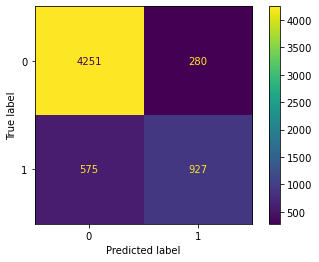

In [17]:
rf_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 25, 20],
    'n_estimators': [300, 450, 600, 800]
}
rf = RandomForestClassifier(oob_score=True, random_state=SEED, n_jobs=-1)

gs = GridSearchCV(rf, rf_params, scoring='f1', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
best_rf = gs.best_estimator_
print(f'OOB Score: {best_rf.oob_score_}')
print(f'Training accuracy: {best_rf.score(X_train, y_train)}')
print(f'Training F1: {f1_score(y_train, best_rf.predict(X_train))}')
print(f'Testing accuracy: {best_rf.score(X_test, y_test)}')
print(f'Testing F1: {f1_score(y_test, best_rf.predict(X_test))}')
plot_confusion_matrix(best_rf, X_test, y_test);

*16) Comment on the differences in performance after cross-validating and tuning. What are the disadvantages of this hyperparameter search methodology?*

<span style="color:green">
As before, the model's variance has decreased and it's performance on unseen data is improved. However, the grid search technique is computationally expensive which makes it slow. Also, it does not result in significant improvements in this case.
</span>

*17) Random forests are widely used for their ability to learn the feature importance or impact in the application domain. Sort and plot the feature importance learned by the tuned random forest.* 

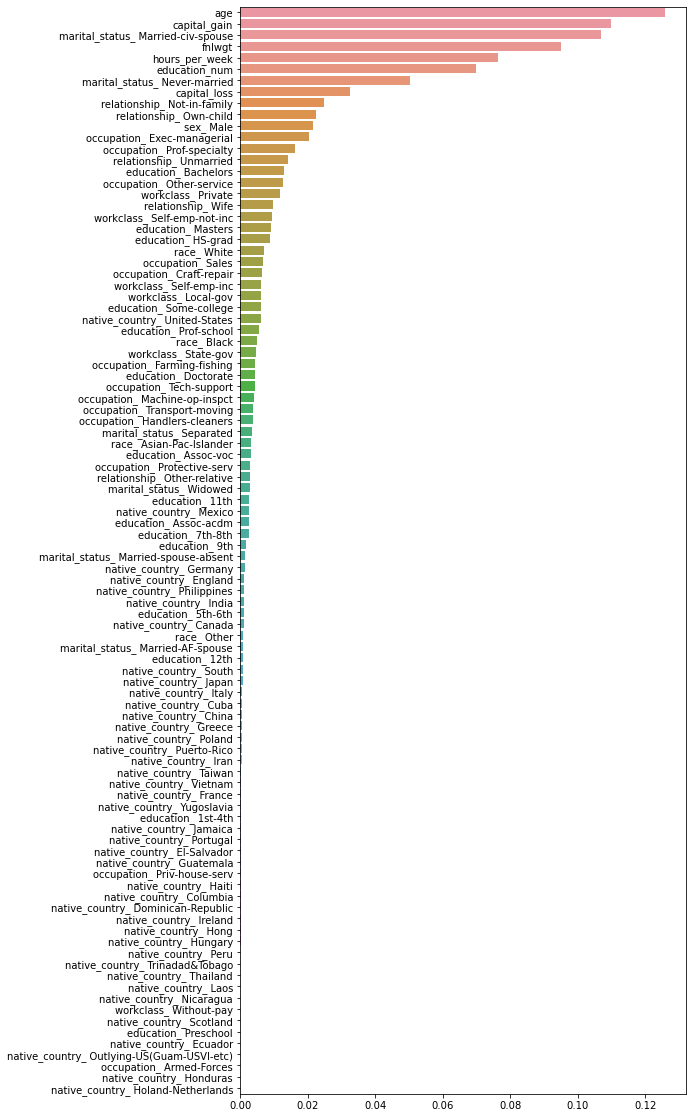

In [19]:
feature_scores = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,20))
sns.barplot(x=feature_scores, y=feature_scores.index);